  
  # $\color{lightblue}{\text{ ASSIGNMENT 2: NATURAL DISASTERS DATASET }}$ #





**Dataset**
*   The Natural Disasters Dataset can be found here: https://www.kaggle.com/competitions/nlpgetting-started/

*   This is a text (NLP) dataset that contains tweet about real disasters, or not (binary classification).

**Objective**
*   Tweets are classified as either being about a real disaster or not.
*   Three learning algorithms have been proposed.
*   Each Model and its performance is explained.
*   Performance summary in the end.

In [ ]:
# Load Dataset and model from github (If the github file has already downloaded, than you can skip this command)
!git clone https://github.com/rongfeng-china/submission_coco.git

Cloning into 'submission_coco'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [9]:
# Open the directory, and make sure you can see the downloaded files
%cd submission_coco

/content/submission_coco


In [10]:
# Check if you can see the downloaded files
!ls 

README.md  sample_submission.csv  test.csv  train.csv


In [ ]:
# Install main libraries
!pip install tensorflow
!pip install keras
!pip install xgboost
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install wordcloud
!pip install scikit-learn
!pip install spacy
!python3 -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-12-03

## TASK1 - Bag of Words Model

In [11]:
# Load Data and Data Visualization
import pandas as pd
train = pd.read_csv("train.csv", encoding="latin-1")
test = pd.read_csv("test.csv", encoding="latin-1")
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Basic EDA

In [12]:
#Missing values in training set
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
#Missing values in Testing set
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [14]:
# Target distribution by class
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

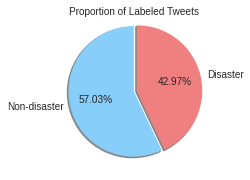

In [15]:
# Target distribution by class visualization

import matplotlib.pyplot as plt
# set the figure size
plt.figure(figsize=(8, 3))
# set the style
plt.style.use('seaborn-darkgrid')
# set the colors
colors = ['lightskyblue', 'lightcoral']
# generate a pie plot
plt.pie(train['target'].value_counts(), explode=(0, 0.05), labels=["Non-disaster", "Disaster"], 
        autopct="%0.2f%%", textprops={'fontsize': 10}, shadow=True, startangle=90, colors=colors)
# add a title
plt.title('Proportion of Labeled Tweets', size=10, y=0.93)
# show the plot
plt.show()


The above figure shows that Disaster class covers 42.97% and Non-disaster class covers 57.03%. The two classes are well distributed, and this dataset is not biased.




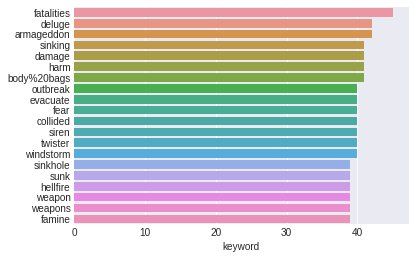

In [16]:
# Visualize 'keyword' in Training dataset
import seaborn as sns
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],
            orient='h')

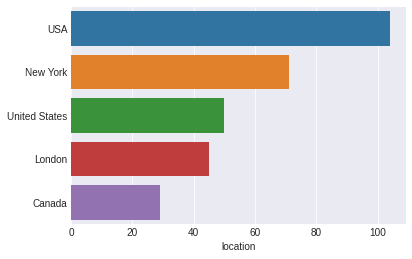

In [17]:
# Visualize 'location' in Training dataset
sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

In [18]:
# WordCloud with un-processed data

# set the random state
random_state = 1010

# import the wordcloud library
from wordcloud import WordCloud

# concat all the text for each labels
non_disaster_text = [''.join(t) for t in train[train['target']==0]['text']]
non_disaster_strings = ' '.join(map(str, non_disaster_text))
disaster_text = [''.join(t) for t in train[train['target']==1]['text']]
disaster_strings = ' '.join(map(str, disaster_text))

# generate word clouds
non_disaster_cloud = WordCloud(width=800, height=400, max_words=500, background_color='black', random_state=random_state).generate(non_disaster_strings)
disaster_cloud = WordCloud(width=800, height=400, max_words=500, background_color='black', random_state=random_state).generate(disaster_strings)

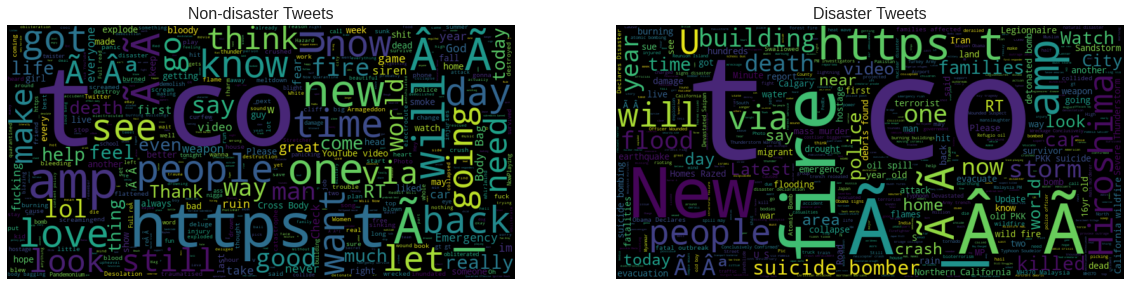

In [19]:
# create subplots for the generated clouds
fig, axes = plt.subplots(1, 2, figsize = (20,20))
axes[0].imshow(non_disaster_cloud, interpolation='bilinear')
axes[1].imshow(disaster_cloud, interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes]

# add titles
axes[0].set_title('Non-disaster Tweets', fontsize=16)
axes[1].set_title('Disaster Tweets', fontsize=16)

# show the figure
plt.show()

The above picture shows the wordcloud of two classes. This is the unprocessed data, you can see 'https', 'A' and 'U' in the wordcloud. For the difference of the two figures, the Non-disaster tweets include 'good', 'new' and 'love', and disaster tweets include 'fire', 'suicide bomber' and 'killed'. 

### Data preprocessing

In [20]:
# Remove the rows that contain null values
train = train.dropna(how="any", axis=1)
train['text_len'] = train['text'].apply(lambda x: len(x.split(' ')))

<ipython-input-20-ff6ba30a36ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text_len'] = train['text'].apply(lambda x: len(x.split(' ')))


In [21]:
# Remove emoji 
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#remove_emoji("Omg another Earthquake 😔😔")

In [22]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

stemmer = nltk.SnowballStemmer("english")

def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords and Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' ') if word not in stop_words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# 1) Lowercase, 2) Remove text in square brackets, 3)Remove links, 
# 4) Remove punctuation, 5) Remove words containing numbers
import string
import re
def clean_text(text):

    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

test['text_clean'] = test['text'].apply(preprocess_data)
train['text_clean'] = train['text'].apply(preprocess_data)
train.head()

,id,text,target,text_len,text_clean
0,1,Our Deeds are the Reason of this #earthquake M...,1,13,deed reason earthquak may allah forgiv us
1,4,Forest fire near La Ronge Sask. Canada,1,7,forest fire near la rong sask canada
2,5,All residents asked to 'shelter in place' are ...,1,22,resid ask shelter place notifi offic evacu she...
3,6,"13,000 people receive #wildfires evacuation or...",1,9,peopl receiv wildfir evacu order california
4,7,Just got sent this photo from Ruby #Alaska as ...,1,17,got sent photo rubi alaska smoke wildfir pour ...


After a series of data preprocessing steps: 1) Lowercase, 2) Remove text in square brackets, 3)Remove links, 4) Remove punctuation, 5) Remove words containing numbers 6) Remove emoji 7) Remove stop words 8) Remove non-value rows, the cleaned text is saved in 'text_clean' column.

### Modeling
1. Bag of words (BOW) features
2. TFIDF transformer
3. Linear SVC classifier

In [24]:
# Define X and y, split data
x = train['text_clean']
y = train['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

5709 5709
1904 1904


Train: 0.977053774741636
Test: 0.7857142857142857


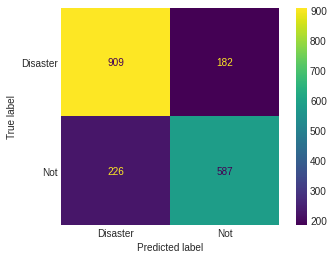

In [63]:
# model training & evaluation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC
'''
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='auc',
    ))
])'''

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', LinearSVC())
])

from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

confusion = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion, display_labels=['Disaster','Not'])
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.savefig('model1_result.png', dpi=300)
plt.show()

## TASK 2 - Feature generation and traditional ML model

*   TF-IDF vectorizer to generate features. TF-IDF Vectorization involves calculating the TF-IDF score for every word in the corpus relative to the document and then putting that infomation as a vector.
*   Uses n-grams up to four words.
*   Select top 80% features with highest scores.
*   This is a binary classification problem. Linear regression and SVM are commonly used for this type of problem. In this case, X value means the 'cleaned text' which is a complicated feature (non-linear), so an SVM with RBF kernel Model is chosen for training and evaluation

Train: 0.9835347696619373
Test: 0.8019957983193278


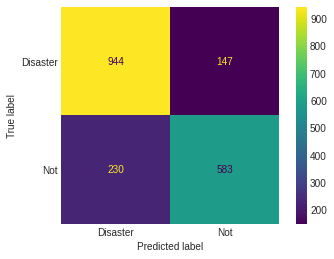

In [64]:
# TF-IDF vectorizer to generate features.
# Uses n-grams up to four words.
# Select top 80% features with highest scores.
# RBF kernel Model training & evaluation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import linear_model


pipe = Pipeline([
        ('vect', TfidfVectorizer(sublinear_tf=True, max_df=.5, stop_words='english',ngram_range=(1,4))),
        ('selector', SelectPercentile(f_classif, percentile=85)),
        ('clf', SVC(kernel='rbf', C=6000, gamma=.0002))
    ])


'''pipe = Pipeline([
          ("tf_idf", TfidfVectorizer()), 
          ("ridge", linear_model.RidgeClassifier())
        ])'''

from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

confusion = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion, display_labels=['Disaster','Not'])
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.savefig('model2_result.png', dpi=300)
plt.show()

## TASK 3 - Pre-trained word embeddings + linear classifier model

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.



### 3.1 Glove + LSTM (This is not required in the task)

In [33]:
train_tweets = train['text_clean'].values
test_tweets = test['text_clean'].values
train_target = train['target'].values

In [34]:
# Calculate the length of our vocabulary
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_tweets)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length


13699

In [35]:
# Padded sentences
from nltk.tokenize import word_tokenize
from keras_preprocessing.sequence import pad_sequences
nltk.download('punkt')

def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)
    
longest_train = max(train_tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(train_tweets), 
    length_long_sentence, 
    padding='post'
)
test_padded_sentences = pad_sequences(
    embed(test_tweets), 
    length_long_sentence,
    padding='post'
)

train_padded_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


array([[3634,  467,  202, ...,    0,    0,    0],
       [ 136,    2,  106, ...,    0,    0,    0],
       [1338,  502, 1806, ...,    0,    0,    0],
       ...,
       [ 448, 1328,    0, ...,    0,    0,    0],
       [  28,  161, 2636, ...,    0,    0,    0],
       [ 171,   31,  413, ...,    0,    0,    0]], dtype=int32)

In [36]:
# Download GloVe model 
!wget http://nlp.stanford.edu/data/glove.6B.zip 

--2022-12-03 18:03:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-03 18:03:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-03 18:03:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [37]:
# unzip the zip file
!unzip glove.6B.zip -d embeddings/

Archive:  glove.6B.zip
  inflating: embeddings/glove.6B.50d.txt  
  inflating: embeddings/glove.6B.100d.txt  
  inflating: embeddings/glove.6B.200d.txt  
  inflating: embeddings/glove.6B.300d.txt  


In [38]:
# Use glove.6B.100d.txt for word embedding
import numpy as np
embeddings_dictionary = dict()
embedding_dim = 100

with open('./embeddings/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2687    ,  0.81708002,  0.69896001, ..., -0.40110001,
         0.74656999,  0.31121999],
       [-0.26872   , -0.15542001, -0.23565   , ...,  0.49344   ,
         0.72114003, -0.041749  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19814   , -0.33517   , -0.13950001, ..., -0.070356  ,
        -0.18391   ,  0.62439001],
       [-0.34132001,  0.26423001,  0.47813001, ..., -0.92395002,
         0.48275   ,  0.52947998]])

In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    train_target, 
    test_size=0.25
)

In [46]:
# GloVe embedding
# LSTM method
from keras.models import Sequential
from keras.layers import LSTM, GlobalMaxPool1D, Embedding, Bidirectional
from keras.layers import BatchNormalization, Dropout
from keras.layers import Activation, Dense


def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

#model = glove_lstm()
#model.summary()

In [47]:
# Load the model and train
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
179/179 [==============================] - ETA: 0s - loss: 0.7955 - accuracy: 0.5509
Epoch 1: val_loss improved from inf to 0.66808, saving model to model.h5
179/179 [==============================] - 20s 72ms/step - loss: 0.7955 - accuracy: 0.5509 - val_loss: 0.6681 - val_accuracy: 0.7117 - lr: 0.0010
Epoch 2/7
179/179 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.6362
Epoch 2: val_loss improved from 0.66808 to 0.59264, saving model to model.h5
179/179 [==============================] - 19s 106ms/step - loss: 0.6543 - accuracy: 0.6362 - val_loss: 0.5926 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 3/7
178/179 [============================>.] - ETA: 0s - loss: 0.5715 - accuracy: 0.7210
Epoch 3: val_loss improved from 0.59264 to 0.50582, saving model to model.h5
179/179 [==============================] - 15s 81ms/step - loss: 0.5714 - accuracy: 0.7211 - val_loss: 0.5058 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 4/7
179/179 [==============================

### Results

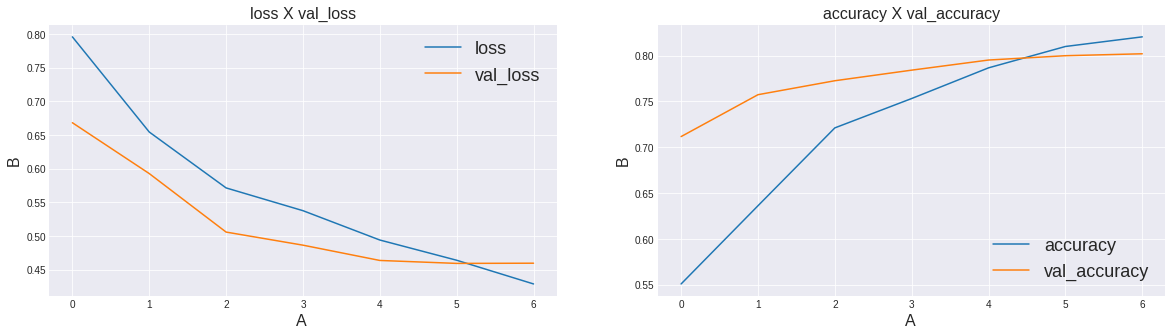

In [48]:
# Learning Curve Visualization
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [49]:
# GloVe + LSTM Result Performance 
from sklearn.metrics import classification_report, accuracy_score

def show_metrics(y_test,preds):
    print("Metrics Report : \n",classification_report(preds,y_test))
    print('\n')
    print("Confusion Matrix : \n ",confusion_matrix(preds,y_test))
    print('\n')
    print("Accuracy Score :",round(accuracy_score(preds,y_test),2))

predict_x= model.predict(X_test)
preds = np.argmax(predict_x,axis=1)
show_metrics(preds, y_test)

60/60 [==============================] - 2s 19ms/step
Metrics Report : 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72      1073
           1       0.00      0.00      0.00       831

    accuracy                           0.56      1904
   macro avg       0.28      0.50      0.36      1904
weighted avg       0.32      0.56      0.41      1904



Confusion Matrix : 
  [[1073    0]
 [ 831    0]]


Accuracy Score : 0.56


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Result: 0.5635504201680672


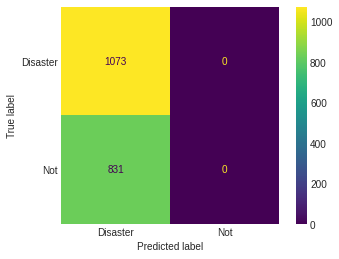

In [50]:
# Result Performance Visualization
print('Result: {}'.format(metrics.accuracy_score(y_test, preds)))

confusion = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion, display_labels=['Disaster','Not'])
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

### 3.2 GloVe + SGDClassifier

GloVe embedding is implemented in Section 3.1. GloVe Embeddings are a type of word embedding that encode the co-occurrence probability ratio between two words as vector differences. The two most used embedding methods are Matrix Factorization Methods and Shallow Window-Based Methods. GloVe embedding combines the strengths of these two methods, and is chosen as a pre-trained word embedding in this case.

GloVe.6B.100d is selected which means the dimension W is 100. In Section 3.1, vocab_length is calculated to be 13699. To guarantee that the model has enough capacity, we need to make sure W > 8.33 logN (log is natural logarithm), W > 8.33 * log(13699) = 79.34. Also, to avoid overfitting, W shouldn't be too large. Thus, W = 100 is selected.

In [51]:
train_tweets = train['text_clean'].values
test_tweets = test['text_clean'].values
train_target = train['target'].values

# Calculate the length of our vocabulary
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_tweets)
word_tokenizer.fit_on_texts(test_tweets)

In [56]:
# Define X and y, split data
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_tweets, train_target, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

5709 5709
1904 1904


Train: 0.9556840077071291
Test: 0.7888655462184874


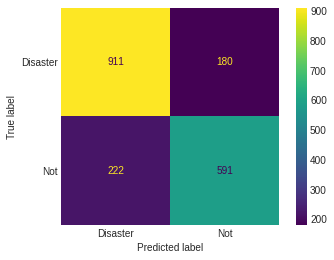

In [65]:
# GloVe embedding 
# SGDClassifier Model training & evaluation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

pipe = Pipeline([
          ("tf_idf", TfidfVectorizer()), 
          ("sgd", linear_model.SGDClassifier())
        ])

from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

confusion3 = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion3, display_labels=['Disaster','Not'])
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.savefig('model3_result.png', dpi=300)
plt.show()

## TASK 4 - Recommendations to the clients

### A simple summary here: 
Method 1: Bag of words (BOW) features, TFIDF transformer, Linear SVC classifier. 
<br>
Training accuracy score is 0.977053774741636 and testing accuracy score is 0.7857142857142857.
<br>
Method 2: TF-IDF vectorization, n-grams up to four words, select top 80% features with highest scores, RBF kernel model as classifier. 
<br>
Training accuracy score is 0.9835347696619373 and testing accuracy score is 0.8019957983193278.
<br>
Method 3: GloVe embedding, plain stochastic gradient descent learning as classifier(SGDClassifier). 
<br>
Training accuracy score is 0.9558591697320021 and testing accuracy score is 0.7867647058823529.

In [80]:
# Result Visualization
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files):
    fig = figure(figsize=(390, 260), dpi=80)
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

list_of_files= ['model1_result.png','model2_result.png','model3_result.png']
showImagesHorizontally(list_of_files)

### Recommendations: <br>
We used different feature preprocessing and classification algorithms in the three given methods. 

1. Preprocessing comparison<br>
The bag-of-words model (BOW) is widely used in document classification where the frequency of occurrence of every word is used as a feature for training a classifier. You can use BOW if your task concerns mainly on word independently and doesn't care about grammar, word order or other word relationships.<br>
Compared to regular TF-weighted BOW, the TFIDF weighting scheme gives more weight to words which appear in fewer documents and less weight to words which appear in many documents. Also, TF-IDF is a simple, fast and easy method. If your task include various types of documents and concern about their weight, or you care about time complexity, then you can use TFIDF vectorization.<br>
TFIDF has its advantages, but sometimes using word frequency to measure the importance of a word in an article is not comprehensive enough, sometimes there may not be enough important words, and this calculation cannot reflect the location information and the importance of the word in the context. If you want to reflect the context structure of words, then you may need to use some GloVe embedding.

2. Classifier comparison<br>
Linear Regression is a simple and fast classification method. You can choose it if your task is a linear problem.<br>
The linear regression method is very sensitive to outliers, and cannot handle non-linear data. If your task includes non-liner and high dimension data, you can use SVM classifier.<br>
SVM classifier uses kernel to handle non-linear problem, and decision tree derives hyper-rectangles in input space to solve the problem. If your task include more categorical data, you can consider decision tree.<br>
Besides, random forest and neural network methods are broadly used for complicated cases. <br>

For this assignment, if you have a simple task with limited budget and only want to have an easy and fast solution, then you can choose the first method. If you have more data in your task, then you can choose the third method. At the same time, you need to explore features, tune parameters and change classifier. The second method would be an option if you want to consider performance, time and budget at the same time.



## TASK 5 - Submission Done.

See instructions under “What to Submit” on the first page of this document.
Submit your exam at statcan.fellowship-fellowship.statcan@statcan.gc.ca
Include:
1. all code used to complete the task and other required auxiliary code
2. share the link to your public Git repository so we can evaluate the code ,figures and documentation